In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from IPython.display import Image # resim import etmek için kullanırız.    Image(filename = "") ile ise resmi import ederiz.
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sbn 
import tensorflow as tf

In [2]:
# polinom regression kullananacağız. 
    # nedir = Y = A + b1.x + b2.(x ** 2) + b3.(x ** 3) + ..... bh.(x ** h) + e(hata payı)     x sabit ancak üsleri değişiyor. aslında basit doğrusalda bir polinomaldir ancak biz yüksek üslüleri ele alacağız. 
    # polinomun derecesinden bahsederken regresyonunda derecesinden bahsedeceğiz. 
 
df = pd.read_csv("bilkav.com_maaslar.csv")
df.head()

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


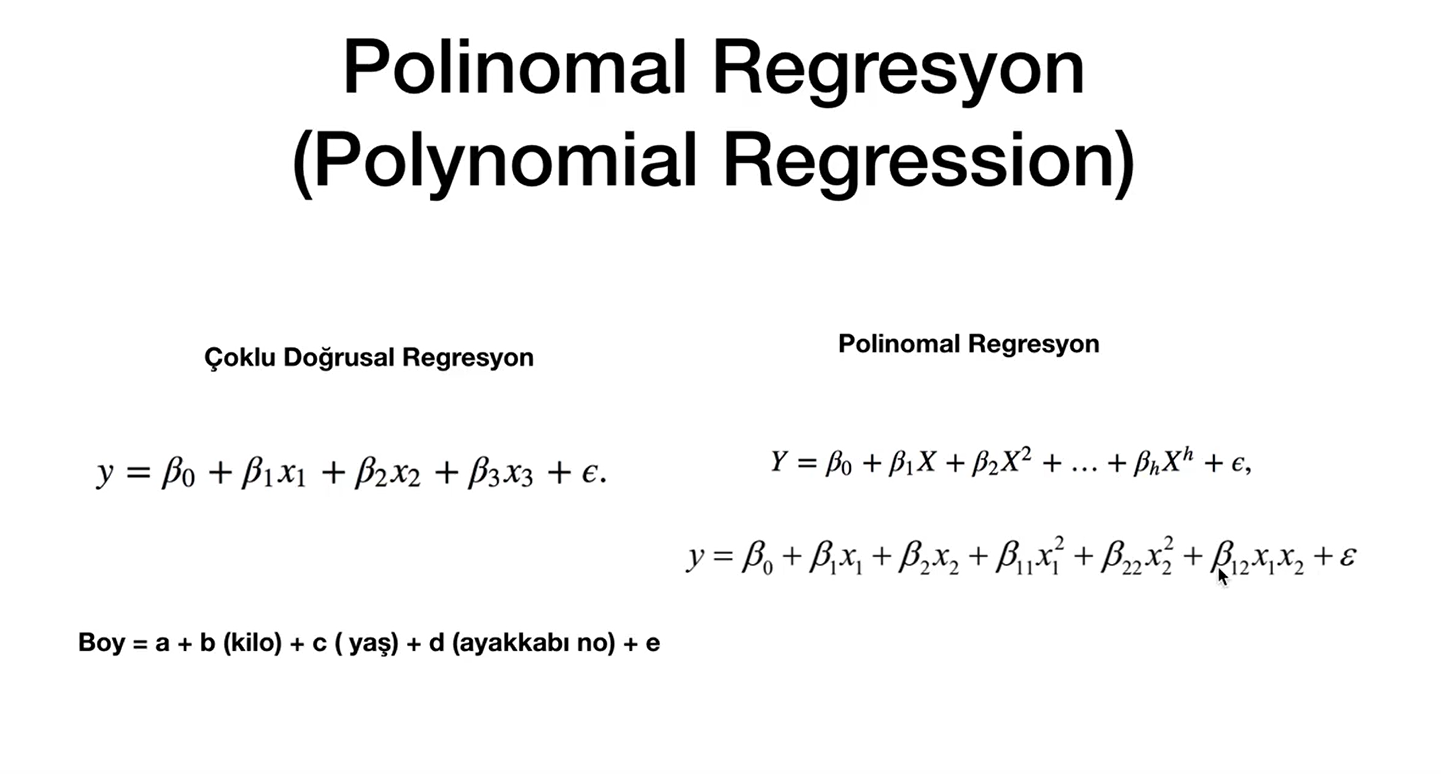

In [3]:
Image(filename="FOTO13.png")

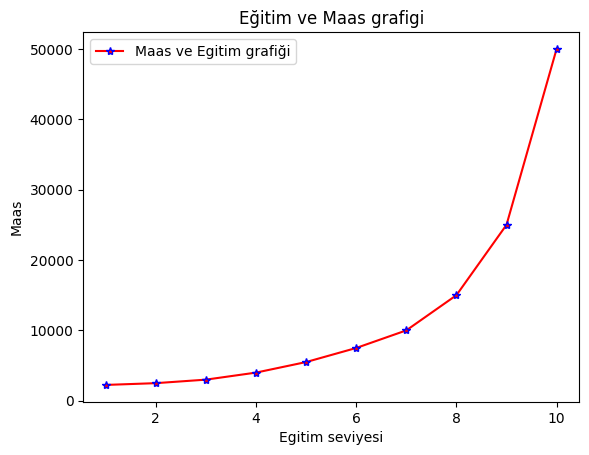

In [5]:
plt.plot(df["Egitim Seviyesi"],df["maas"],color = "red",marker = "*",markeredgecolor = "b",label = "Maas ve Egitim grafiği")
plt.xlabel("Egitim seviyesi")
plt.ylabel("Maas")
plt.title("Eğitim ve Maas grafigi")
plt.legend(loc = 2)
plt.show() # görüldüğü üzere yüksek dereceli bir sistem var doğrusal değil. parabolik bir yapı. bundan dolayı polinomal regression kullanacağız.

In [8]:
x = df["Egitim Seviyesi"].values
y = df["maas"].values
print(x)
print(y)


0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Egitim Seviyesi, dtype: int64
0     2250
1     2500
2     3000
3     4000
4     5500
5     7500
6    10000
7    15000
8    25000
9    50000
Name: maas, dtype: int64


In [7]:
x2 = df.iloc[:,1:2]
y2 = df.iloc[:,2:]
print(x2)
print(y2) 

   Egitim Seviyesi
0                1
1                2
2                3
3                4
4                5
5                6
6                7
7                8
8                9
9               10
    maas
0   2250
1   2500
2   3000
3   4000
4   5500
5   7500
6  10000
7  15000
8  25000
9  50000


In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [15]:
lin_reg.fit(x2,y2)


LinearRegression()

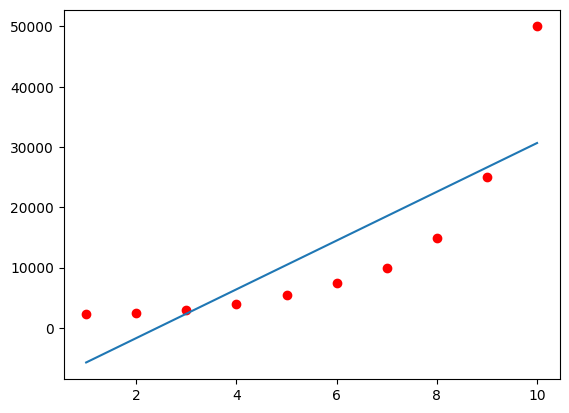

In [16]:
plt.scatter(x2,y2,color = "red")
plt.plot(x2,lin_reg.predict(x2))
plt.show() # burada görüldüğü gibi. düz çizgimiz lineer regresyon kırmızı veriler ise gerçek veriler.

In [17]:
x3 = x2.values
y3 = y2.values

In [19]:
# NASIL POLİNOMAL BİR REGRESSİON KURACAĞIZ.
from sklearn.preprocessing import PolynomialFeatures # bir class çağırdık. herhangi bir sayıyı polinomal olarak ifade etmemize yarar bu sınıf.


In [20]:
pol_reg = PolynomialFeatures(degree=2) 

In [21]:
x_ploy = pol_reg.fit_transform(x3)
x_ploy

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [22]:
lin_reg2 = LinearRegression() 

In [23]:
lin_reg2.fit(x_ploy,y2)

LinearRegression()

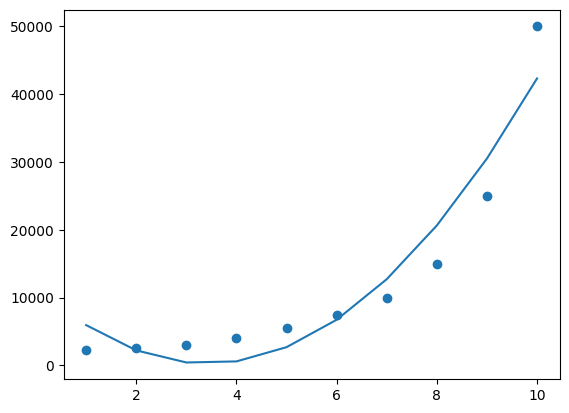

In [26]:
plt.scatter(x2,y2)
plt.plot(x2,lin_reg2.predict(pol_reg.fit_transform(x3)))
plt.show() # burada gözüktüğü gibi daha doğru karar alabilen bir sistem kurduk.